# Task 1. Prediction using Supervised Machine Learning

The task involves predicting the percentage of a student based on the number of study hours.

### 1. Importing the required Libraries

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Importing the Dataset

In [2]:
#Importing the Data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("The Data was imported successfully")

data

The Data was imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 3. Visualizing the data

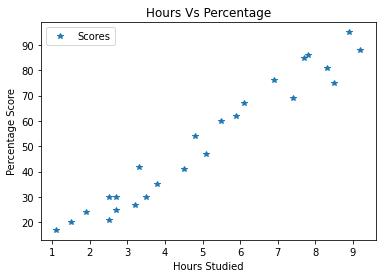

In [6]:
#Plotting the distribution of scores
data.plot(x = 'Hours', y = 'Scores', style='*')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

###  4. **Data Pre-processing**

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                          test_size = 0.2, random_state = 0)

### 5. **Training the Algorithm**

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training is complete")

Training is complete


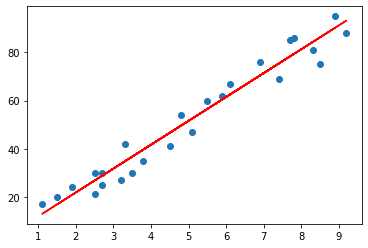

In [18]:
#Plotting the regression Line
line = regressor.coef_*X + regressor.intercept_

#plotting for the test data
plt.scatter(X,y)
plt.plot(X,line, color='red');
plt.show()

From the above graph, we can clearly see that their is a positive relationship between no. of hours studied & percentage of score

### 6. **Making Predictions**

In [11]:
print(X_test)   
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
#Comparing Actual Vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#Testing with our own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of hours = [[9.25]]
Predicted Score = 93.69173248737535


### 6. **Evaluating the Model**

In [14]:
from sklearn import metrics
print('mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

mean Absolute Error:  4.183859899002975
